Code to make Figure 3.  Assumes the results of cspad.cbf_metrology have been generated using this command:

`cspad.cbf_metrology /reg/d/psdm/cxi/cxi78513/scratch/brewster/paper_2017/results/r0*/012_rg001/out method=expanding flat_refinement=True flat_refinement_with_distance=True n_subset=3000 n_subset_method=n_refl n_refl_panel_list=10,26,42,58`

In [1]:
from xfel.command_line.detector_residuals import phil_scope, ResidualsPlotter
from matplotlib import pyplot as plt
from dxtbx.model.experiment_list import ExperimentListFactory
from dials.array_family import flex
from libtbx import easy_pickle
from iotbx.phil import parse
import os

write_png = False

# original metro_root = "/reg/d/psdm/cxi/cxi78513/res/brewster/paper_2017/metrology/t012_rg001_3000_expanding_rd"
metro_root = "data/figure3"

overrides = """
residuals.exclude_outliers_from_refinement=False
residuals.plot_max=0.3
hierarchy_level=2
dot_size=1
colormap=YlGnBu_r
panel_numbers=False
plots.per_image_RMSDs_histogram=False
plots.deltaXY_by_deltapsi=False
plots.unit_cell_histograms=False
plots.include_radial_and_transverse=False
repredict_input_reflections=False
verbose=False
"""
if write_png:
    overrides += "save_png=True"

params = phil_scope.fetch(sources = [parse(overrides)]).extract()

In [4]:
# Prep the intermediate pickles
for step in xrange(1, 8):
    if step == 1:
        level = 1
    else:
        level = 2
    unrefined_reflections = easy_pickle.load(os.path.join(metro_root, "cspad_reflections_step%d.pickle"%(step)))
    refined_reflections = easy_pickle.load(os.path.join(metro_root,
                                                       "cspad_refined_reflections_step%d_level%d.pickle"%(step-1, level)))
                                             
    unrefined_panels = set(unrefined_reflections['panel'])
    refined_panels = set(refined_reflections['panel'])
    
    pre_step_refls = flex.reflection_table()
    for panel in unrefined_panels:
        if panel in refined_panels:
            pre_step_refls.extend(refined_reflections.select(refined_reflections['panel'] == panel))
        else:
            pre_step_refls.extend(unrefined_reflections.select(unrefined_reflections['panel'] == panel))
    output_name = "pre_step%d.pickle"%(step)
    print output_name
    pre_step_refls.as_pickle(os.path.join(metro_root, 'inputs', output_name))
    

pre_step1.pickle
pre_step2.pickle
pre_step3.pickle
pre_step4.pickle
pre_step5.pickle
pre_step6.pickle
pre_step7.pickle


In [2]:
def plot_cycle(step = "", base_name = "refined", cycle=None):
    if cycle is None:
        cycle = ''
    else:
        cycle = "/v%d_refine"%cycle
    options = {'metro_root':metro_root, 'step':step, 'base':base_name, 'cycle':cycle}
    if len(step) > 0: options['step'] = "_" + options['step']

    experiments = ExperimentListFactory.from_json_file("{metro_root}{cycle}/cspad_{base}_experiments{step}.json" \
                                                       .format(**options), check_format = False)
    reflections = easy_pickle.load("{metro_root}{cycle}/cspad_{base}_reflections{step}.pickle" \
                                   .format(**options))
    params.tag = (base_name + step + cycle).replace('/','_')
    ResidualsPlotter(params, experiments, reflections).plot_all()
    if write_png:
        plt.close('all')
        
def plot_cycle_command(step = "", base_name = "refined", cycle=None):
    # Use this version to print the command line version
    if cycle is None:
        cycle = ''
    else:
        cycle = "/v%d_refine"%cycle
    options = {'metro_root':metro_root, 'step':step, 'base':base_name, 'cycle':cycle}
    if len(step) > 0: options['step'] = "_" + options['step']

    experiments = "{metro_root}{cycle}/cspad_{base}_experiments{step}.json" \
                                                       .format(**options)
    reflections = "{metro_root}{cycle}/cspad_{base}_reflections{step}.pickle" \
                                   .format(**options)
    tag = (base_name + step + cycle).replace('/','_')
    print "dev.cctbx.xfel.detector_residuals", " ".join(overrides.split('\n')), experiments, reflections, "tag=%s"%tag


Dataset RMSD (microns) 220.991673958
Setting up stats...


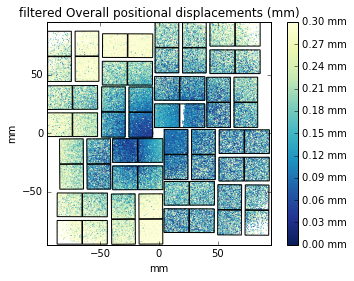

Dataset RMSD (microns) 129.428111042
Setting up stats...


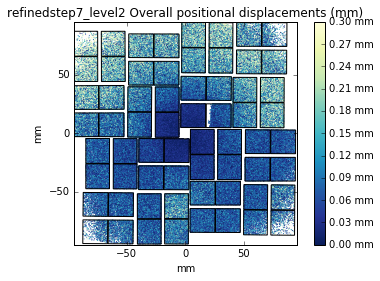

Dataset RMSD (microns) 62.2624279003
Setting up stats...


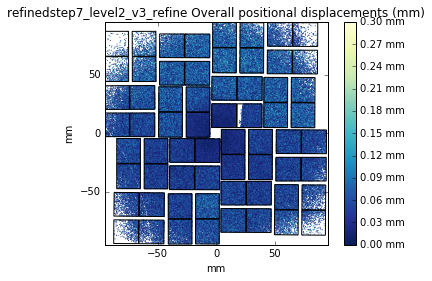

Dataset RMSD (microns) 54.3778252525
Setting up stats...


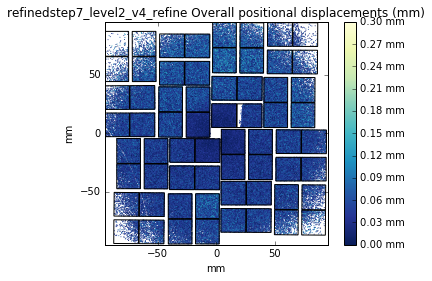

Dataset RMSD (microns) 51.6397058818
Setting up stats...


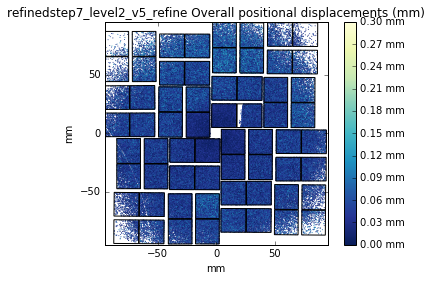

In [4]:
# Panel a: cycles of indexing and refinement
plot_cycle(base_name="filtered")
plot_cycle("step7_level2")
plot_cycle("step7_level2", cycle=3)
plot_cycle("step7_level2", cycle=4)
plot_cycle("step7_level2", cycle=5)


In [5]:
def plot_step(tag, experiments_tag, reflections_tag):
    options = {'metro_root':metro_root, 'experiments_tag':experiments_tag, 'reflections_tag':reflections_tag}
    
    experiments = ExperimentListFactory.from_json_file("{metro_root}/{experiments_tag}.json" \
                                                       .format(**options), check_format = False)
    reflections = easy_pickle.load("{metro_root}/{reflections_tag}.pickle" \
                                   .format(**options))
    params.tag = tag
    ResidualsPlotter(params, experiments, reflections).plot_all()
    if write_png:
        plt.close('all')

def plot_step_command(tag, experiments_tag, reflections_tag):
    # Use this version to print the command line version
    options = {'metro_root':metro_root, 'experiments_tag':experiments_tag, 'reflections_tag':reflections_tag}
    
    experiments = "{metro_root}/{experiments_tag}.json" \
                                                       .format(**options)
    reflections = "{metro_root}/{reflections_tag}.pickle" \
                                   .format(**options)
    print "dev.cctbx.xfel.detector_residuals", " ".join(overrides.split('\n')), experiments, reflections, "tag=%s"%tag


Dataset RMSD (microns) 134.458254401
Setting up stats...


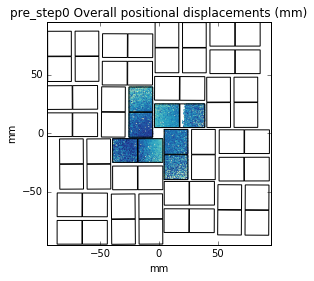

Dataset RMSD (microns) 99.7347353314
Setting up stats...


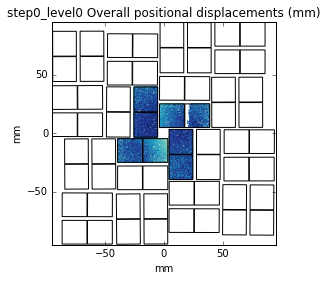

Dataset RMSD (microns) 66.6749757008
Setting up stats...


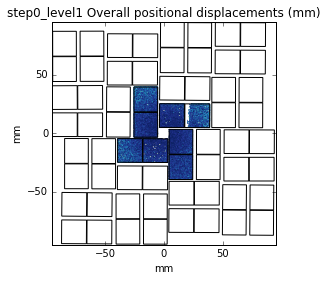

In [6]:
# Panel b, top row
plot_step("pre_step0", "cspad_filtered_experiments", "cspad_reflections_step0")
plot_step("step0_level0", "cspad_refined_experiments_step0_level0", "cspad_refined_reflections_step0_level0")
plot_step("step0_level1", "cspad_refined_experiments_step0_level1", "cspad_refined_reflections_step0_level1")

Dataset RMSD (microns) 142.298449102
Setting up stats...


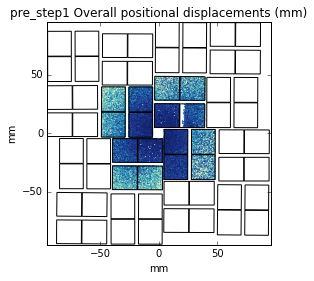

Dataset RMSD (microns) 87.1141282295
Setting up stats...


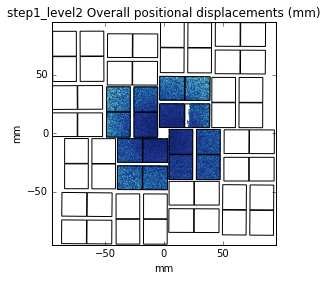

In [7]:
# Panel b, row 2
params.repredict_input_reflections = False
plot_step("pre_step1", "cspad_refined_experiments_step0_level1", "inputs/pre_step1")
plot_step("step1_level2", "cspad_refined_experiments_step1_level2", "cspad_refined_reflections_step1_level2")

Dataset RMSD (microns) 143.844898583
Setting up stats...


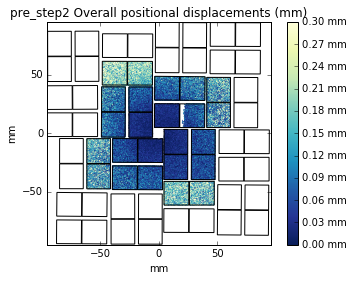

Dataset RMSD (microns) 105.835508557
Setting up stats...


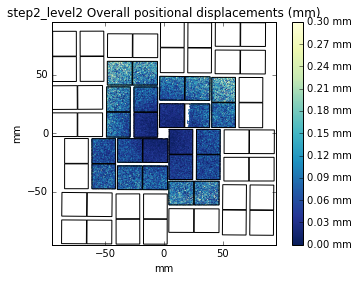

Dataset RMSD (microns) 157.46357309
Setting up stats...


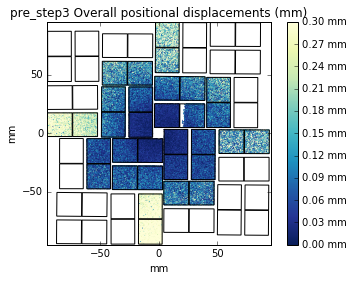

Dataset RMSD (microns) 116.99802443
Setting up stats...


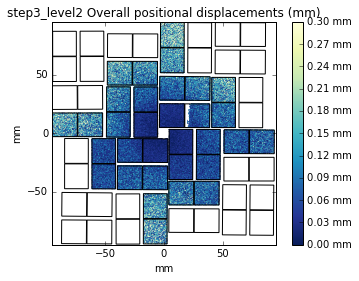

In [8]:
# Panel b, row 3
params.repredict_input_reflections = False
plot_step("pre_step2", "cspad_refined_experiments_step1_level2", "inputs/pre_step2")
plot_step("step2_level2", "cspad_refined_experiments_step2_level2", "cspad_refined_reflections_step2_level2")
plot_step("pre_step3", "cspad_refined_experiments_step2_level2", "inputs/pre_step3")
plot_step("step3_level2", "cspad_refined_experiments_step3_level2", "cspad_refined_reflections_step3_level2")

Dataset RMSD (microns) 145.258681665
Setting up stats...


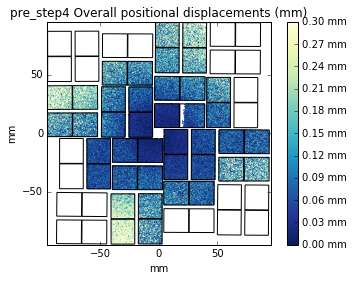

Dataset RMSD (microns) 121.067263849
Setting up stats...


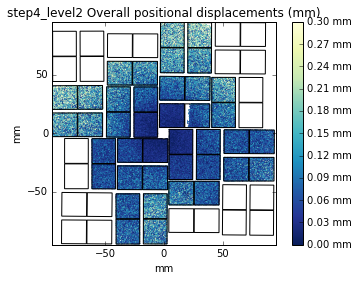

Dataset RMSD (microns) 148.743434618
Setting up stats...


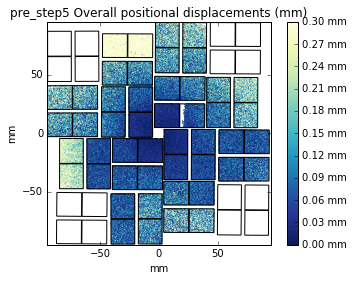

Dataset RMSD (microns) 127.821160738
Setting up stats...


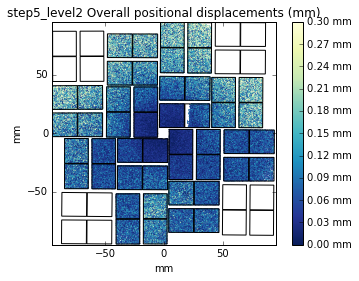

In [9]:
# Panel b, row 4
params.repredict_input_reflections = False
plot_step("pre_step4", "cspad_refined_experiments_step3_level2", "inputs/pre_step4")
plot_step("step4_level2", "cspad_refined_experiments_step4_level2", "cspad_refined_reflections_step4_level2")
plot_step("pre_step5", "cspad_refined_experiments_step4_level2", "inputs/pre_step5")
plot_step("step5_level2", "cspad_refined_experiments_step5_level2", "cspad_refined_reflections_step5_level2")

Dataset RMSD (microns) 143.259991421
Setting up stats...


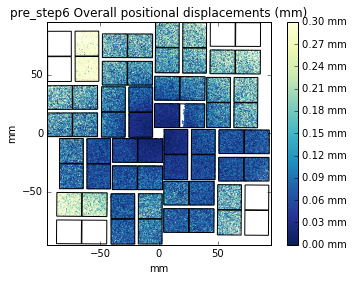

Dataset RMSD (microns) 129.265283605
Setting up stats...


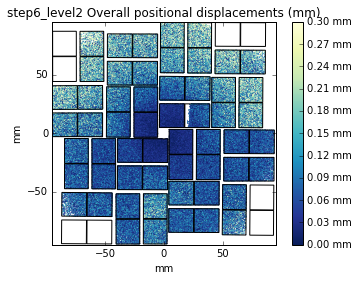

Dataset RMSD (microns) 136.934048536
Setting up stats...


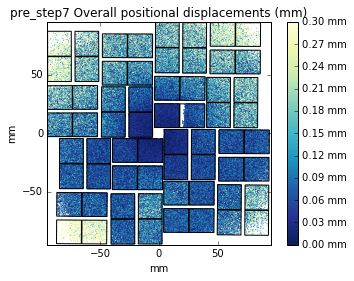

Dataset RMSD (microns) 129.428111042
Setting up stats...


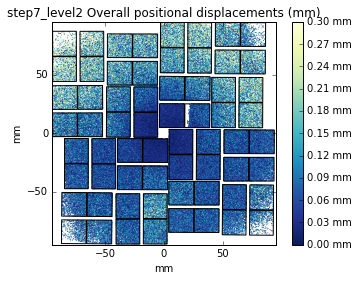

In [10]:
# Panel b, row 5
params.repredict_input_reflections = False
plot_step("pre_step6", "cspad_refined_experiments_step5_level2", "inputs/pre_step6")
plot_step("step6_level2", "cspad_refined_experiments_step6_level2", "cspad_refined_reflections_step6_level2")
plot_step("pre_step7", "cspad_refined_experiments_step6_level2", "inputs/pre_step7")
plot_step("step7_level2", "cspad_refined_experiments_step7_level2", "cspad_refined_reflections_step7_level2")